## Part1: Exploratory Data Analysis(EDA)

In [1]:
# 라이브러리를 불러옵니다.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

# 커널을 구성하다보면 에러는 아니지만, 빨간색 네모 박스 warning이 뜨는 경우가 많다. 
# 그런 보기 싫은 부분들을 제거해주겠다.
import warnings
warnings.filterwarnings('ignore')

# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것
# %matplotlib inline

# os 패키지를 통해 현재 디렉토리 위치를 변경하고, read_csv를 더 편리하게 할 수 있음
import os
# os.getcwd() # 현재 디렉토리 파악
# os.chdir(r"______") # 불러오고 싶은 파일이 위치한 주소를 ___에 입력
from collections import Counter
from glob import glob


# 다른 노트북 작성할 때도 이 셀만 떼서 사용 가능하다.
import platform                

# 웬만하면 해주는 것이 좋다.
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin': #맥os 사용자의 경우에
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':#윈도우 사용자의 경우에
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)

# tqdm
from tqdm.notebook import tqdm

# 이유한님
 # 이 두줄은 본 필자가 항상 쓰는 방법입니다. matplotlib 의 기본 scheme 말고 seaborn scheme 을 세팅하고, 일일이 graph 의 font size 를 지정할 필요 없이 seaborn 의 font_scale 을 사용하면 편합니다.
import missingno as msno
plt.style.use('seaborn')
# sns.set(font_scale=1)

In [2]:
df = pd.read_csv('c:/reposit/data/kaggle/titanic/train.csv')
df.shape

(891, 12)

In [3]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
df.isnull().sum().to_frame()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


### 1.1 How many Survived??

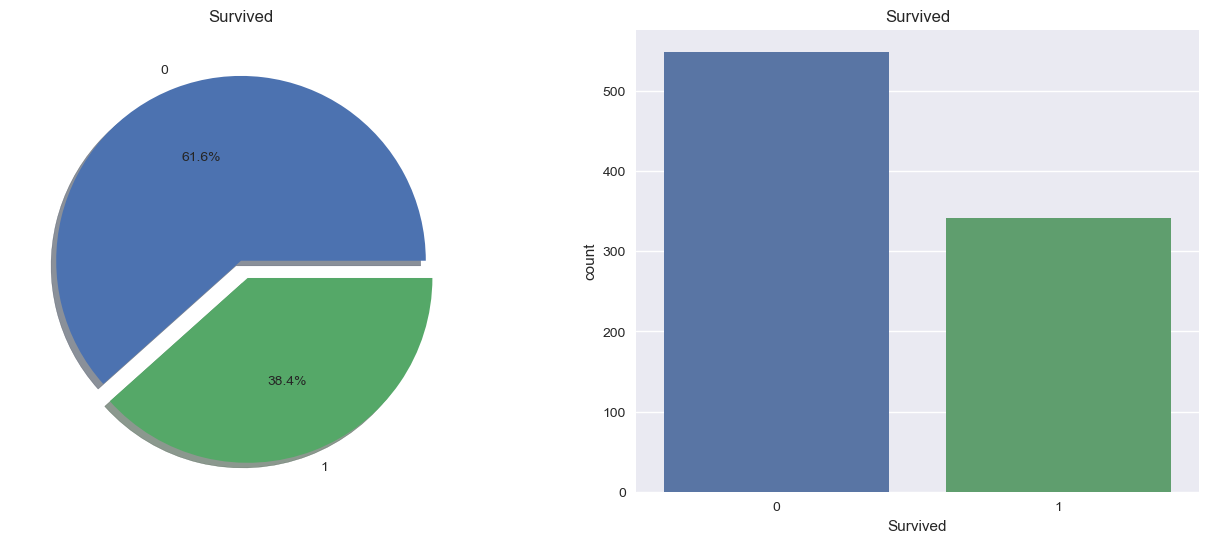

In [5]:
f, ax = plt.subplots(1, 2, figsize=(16, 6))
df['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot(data=df, x='Survived', ax=ax[1])
ax[1].set_title('Survived')
plt.show()

### 1.2 Sex -> Categorical Feature

In [6]:
df.groupby(['Sex', 'Survived'])['Survived'].count().to_frame()

Survived
Sex    Survived          
female 0               81
       1              233
male   0              468
       1              109

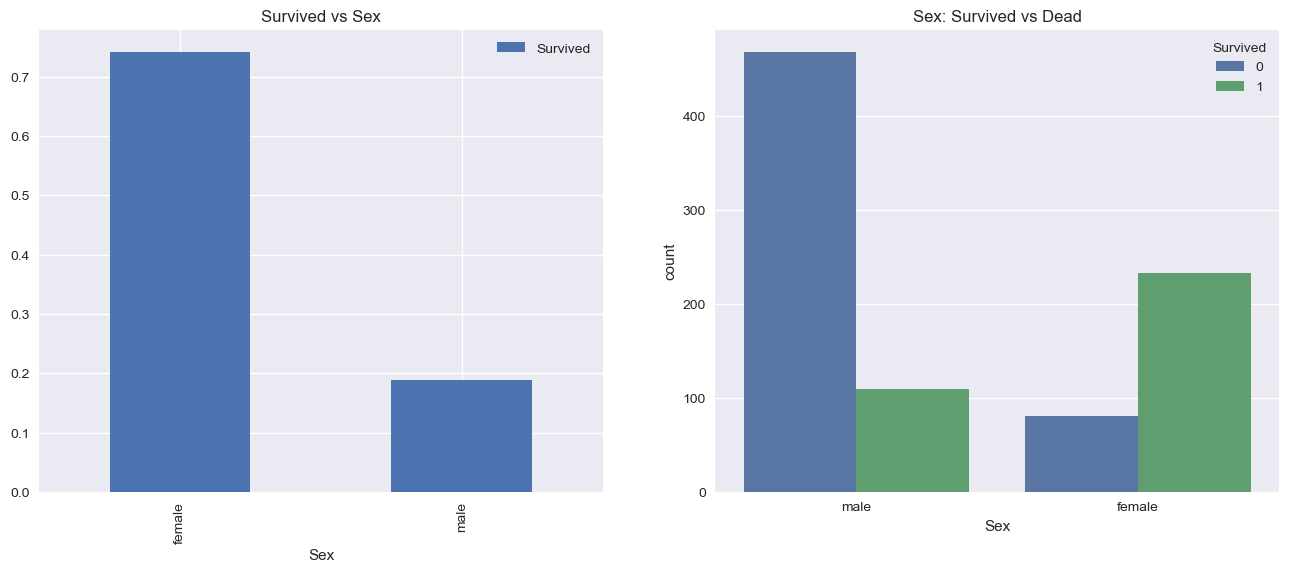

In [7]:
f, ax = plt.subplots(1, 2, figsize=(16, 6))
df[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot(data=df, x='Sex', hue='Survived', ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')

plt.show()

### 1.3 Pclass -> Ordinal Feature

In [8]:
pd.crosstab(df.Pclass, df.Survived, margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [9]:
pd.crosstab(df.Pclass, df.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


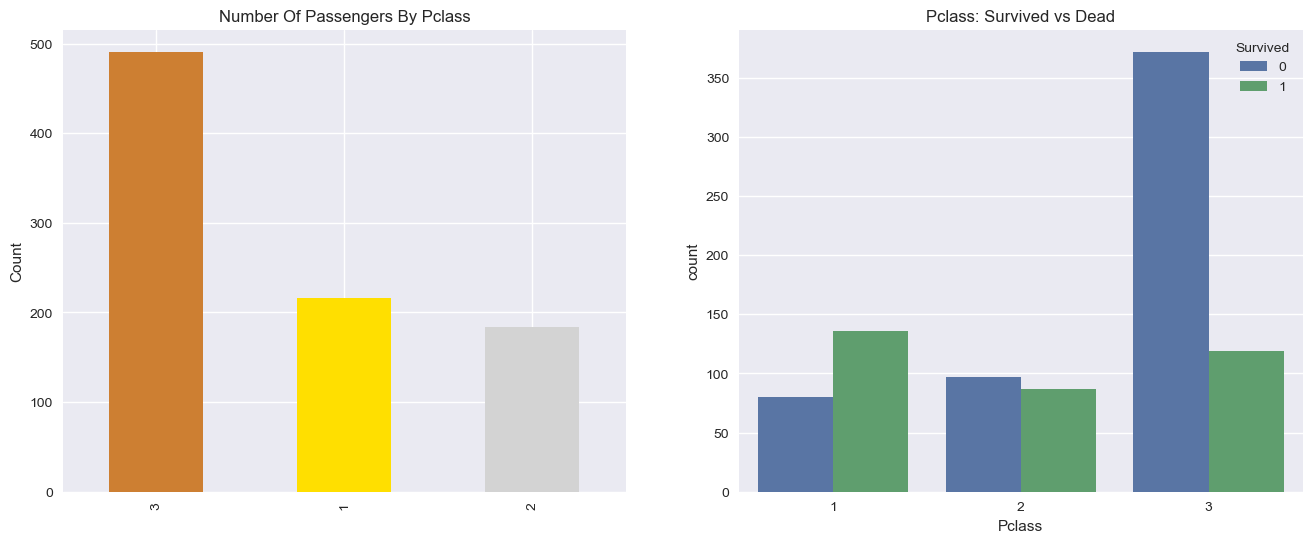

In [10]:
f, ax = plt.subplots(1, 2, figsize=(16, 6))

df.Pclass.value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=df, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')

plt.show()

In [11]:
pd.crosstab([df.Sex, df.Survived], df.Pclass, margins=True)

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

In [12]:
pd.crosstab([df.Sex, df.Survived], df.Pclass, margins=True).style.background_gradient(cmap='summer_r')

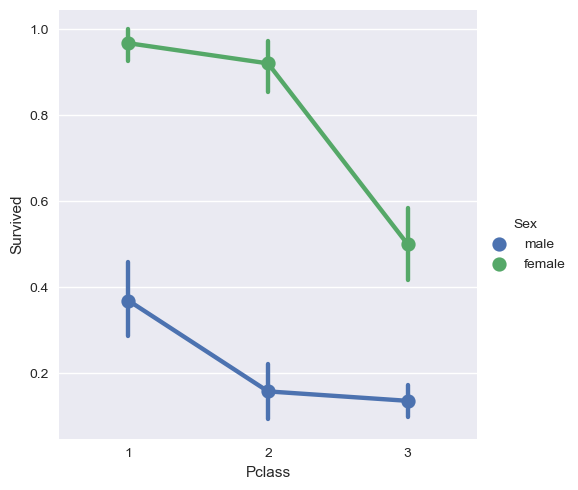

In [13]:
sns.factorplot(data=df, x='Pclass', y='Survived', hue='Sex')
plt.show()

### 1.4 Age -> Continous Feature

In [14]:
print('Oldest Passenger was of:', df['Age'].max(), 'Years')
print('Yongest Passenger was of:', df['Age'].min(), 'Years')
print('Average Age on the ship:', df['Age'].mean(), 'Years')

Oldest Passenger was of: 80.0 Years
Yongest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


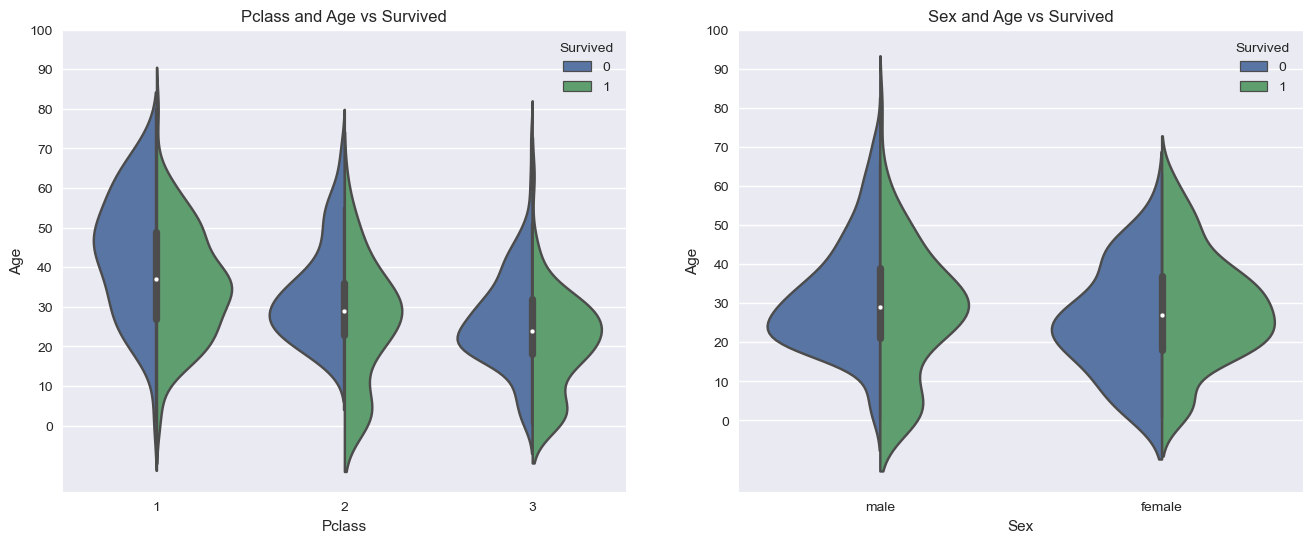

In [15]:
f, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot(data=df, x='Sex', y='Age', hue='Survived', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))

plt.show()

### 1.5 What's In A Name?? -> Feature

In [16]:
df['Initial'] = 0

for i in df:
    df['Initial'] = df.Name.str.extract('([A-Za-z]+)\.')
    
df.Initial.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [17]:
pd.crosstab(df.Initial, df.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [18]:
df['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don'], ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr'], inplace=True)

In [19]:
df.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

### 1.6 Filling NaN Ages

In [20]:
df.loc[(df.Age.isnull())&(df.Initial=='Mr'), 'Age'] = 33
df.loc[(df.Age.isnull())&(df.Initial=='Mrs'), 'Age'] = 36
df.loc[(df.Age.isnull())&(df.Initial=='Master'), 'Age'] = 5
df.loc[(df.Age.isnull())&(df.Initial=='Miss'), 'Age'] = 22
df.loc[(df.Age.isnull())&(df.Initial=='Other'), 'Age'] = 46

In [21]:
df.Age.isnull().any()

False

In [22]:
df.Cabin.isnull().any()

True

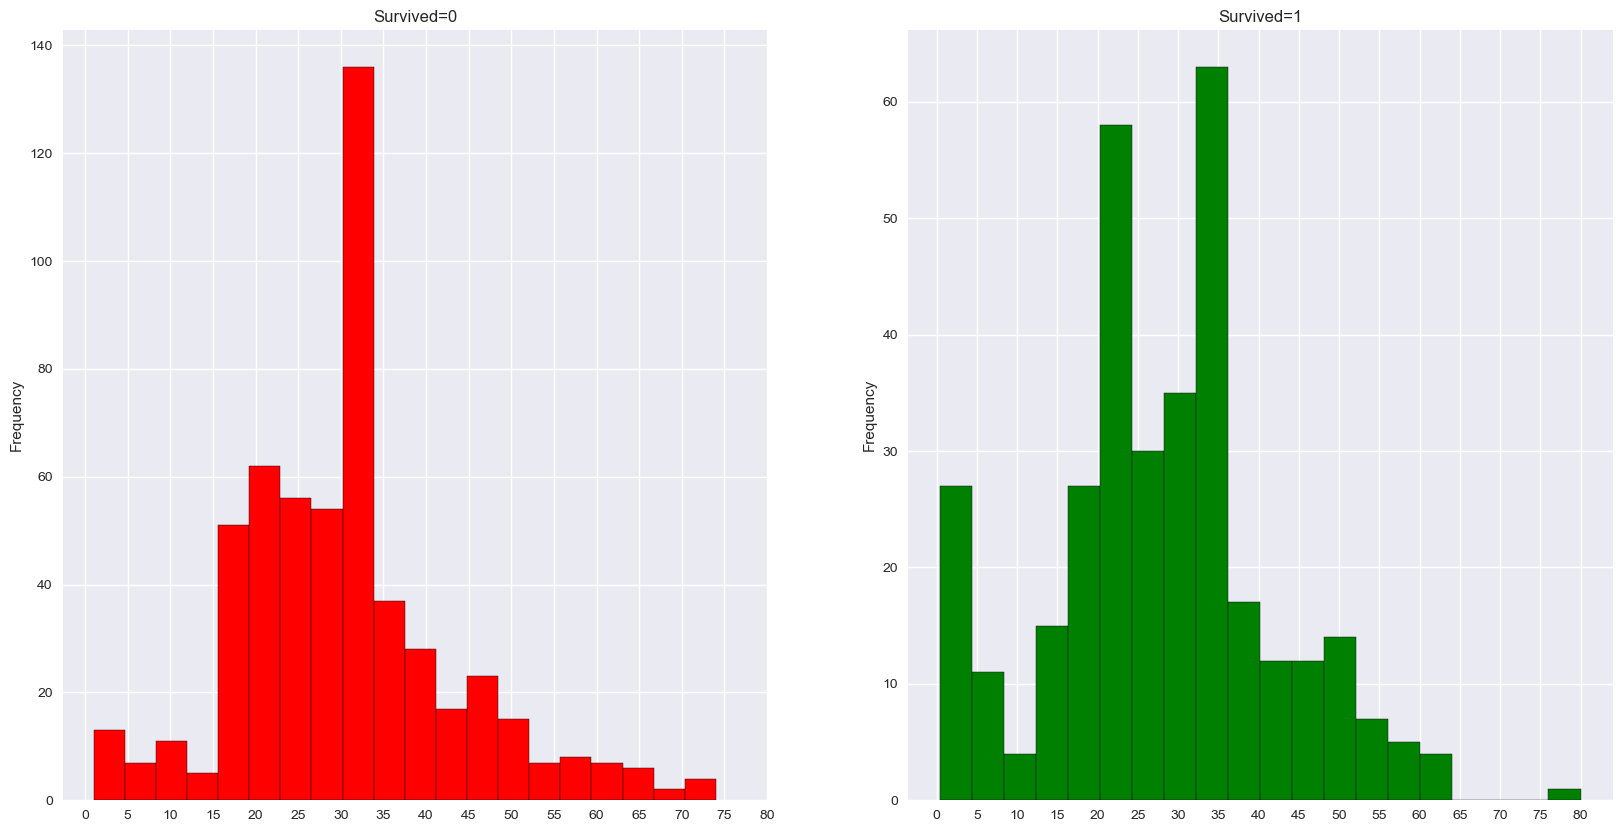

In [23]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

df[df['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived=0')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)

df[df['Survived']==1].Age.plot.hist(ax=ax[1], color='green', bins=20, edgecolor='black')
ax[1].set_title('Survived=1')
x2 = list(range(0, 85, 5))
ax[1].set_xticks(x2)

plt.show()

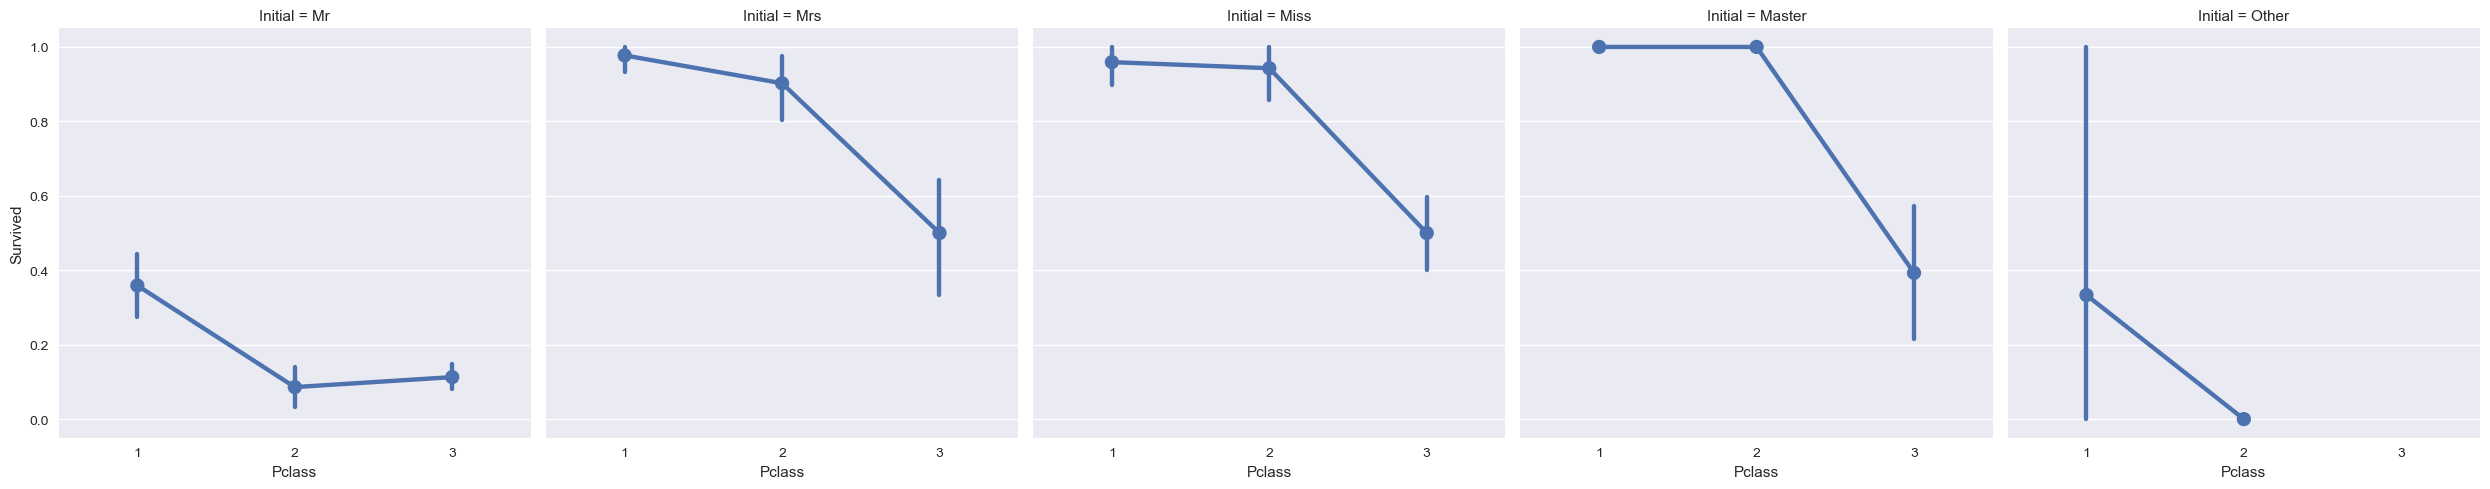

In [24]:
sns.factorplot(data=df, x='Pclass', y='Survived', col='Initial')
plt.show()

### 1.7 Embarked -> Categorical Value

In [25]:
pd.crosstab([df.Embarked, df.Pclass], [df.Sex, df.Survived], margins=True).style.background_gradient(cmap='summer_r')

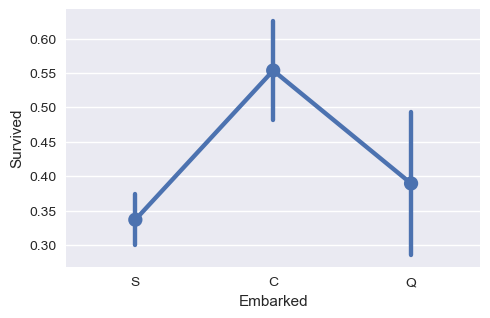

In [26]:
sns.factorplot(data=df, x='Embarked', y='Survived')
fig = plt.gcf()
fig.set_size_inches(5, 3)
plt.show()

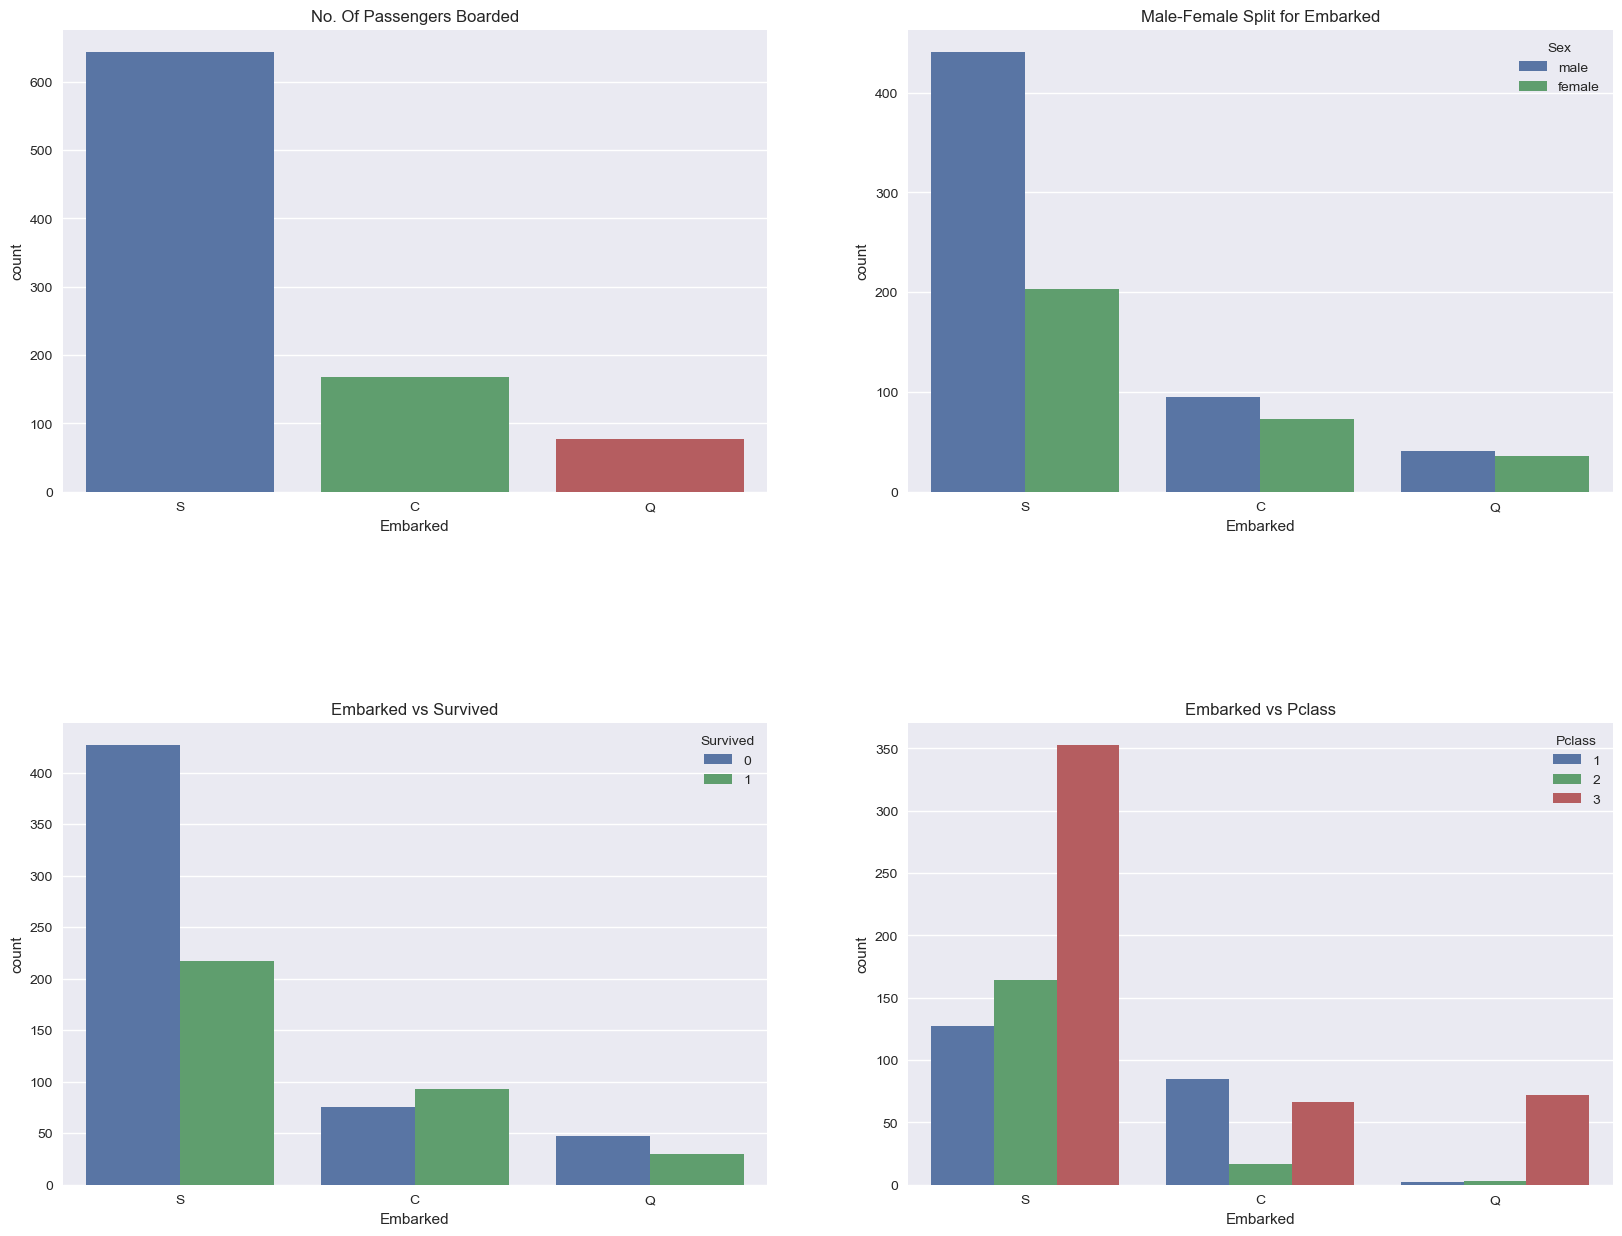

In [27]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))

sns.countplot(data=df, x='Embarked', ax=ax[0, 0])
ax[0, 0].set_title('No. Of Passengers Boarded')

sns.countplot(data=df, x='Embarked', hue='Sex', ax=ax[0, 1])
ax[0, 1].set_title('Male-Female Split for Embarked')

sns.countplot(data=df, x='Embarked', hue='Survived', ax=ax[1, 0])
ax[1, 0].set_title('Embarked vs Survived')

sns.countplot(data=df, x='Embarked', hue='Pclass', ax=ax[1, 1])
ax[1, 1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=.2, hspace=.5)
plt.show()

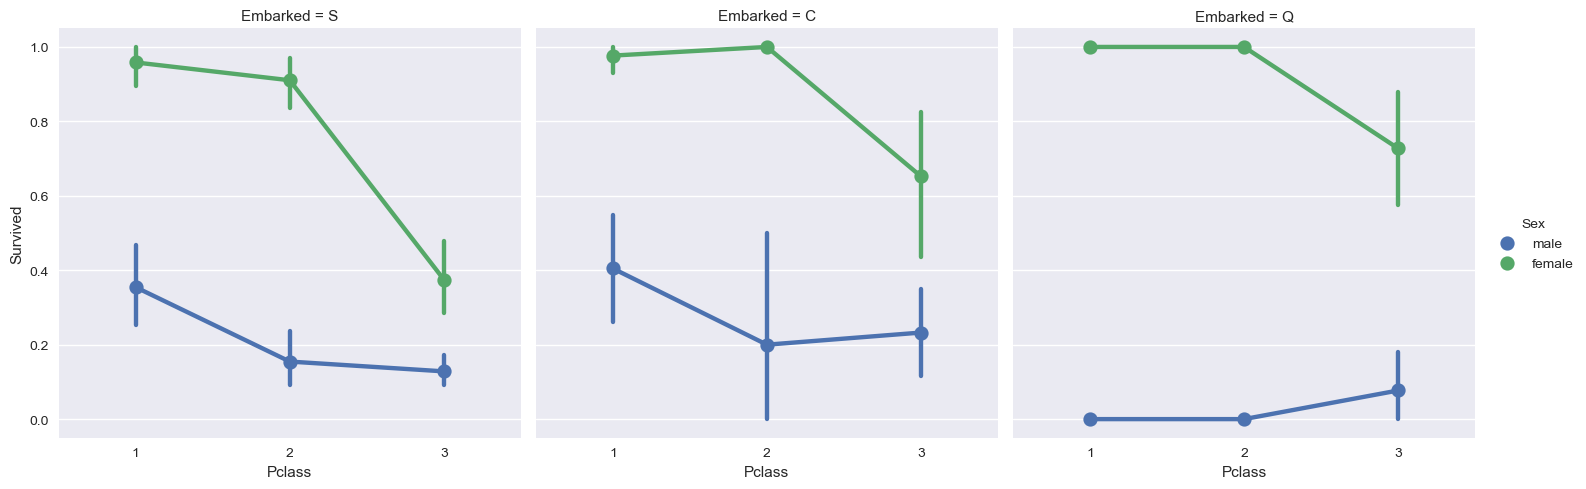

In [28]:
sns.factorplot(data=df, x='Pclass', y='Survived', hue='Sex', col='Embarked')
plt.show()

In [29]:
df['Embarked'].fillna('S', inplace=True)

In [30]:
df.Embarked.isnull().any()

False

### SibSip -> Discrete Feature

In [31]:
pd.crosstab(index=df.SibSp, columns=df.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


# !@#!@#

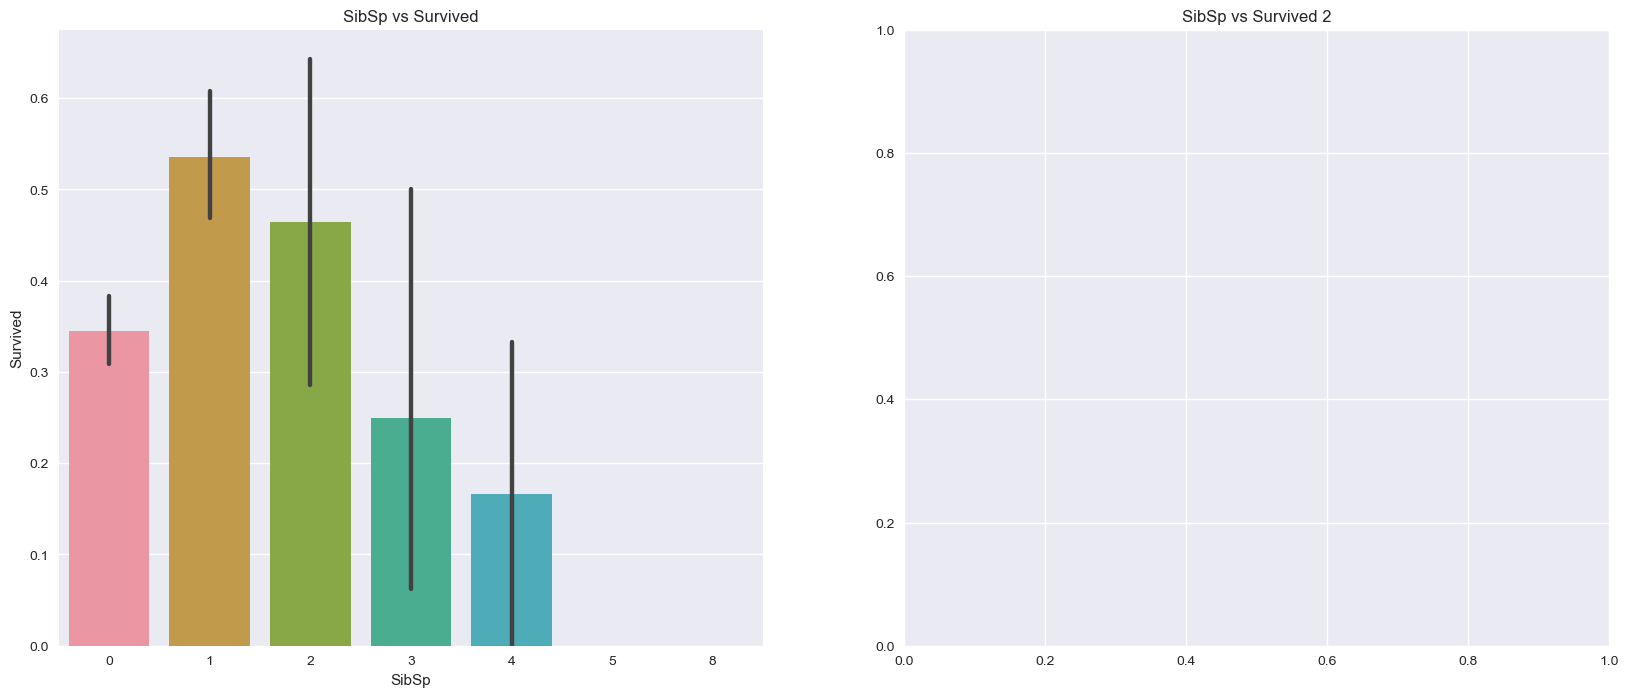

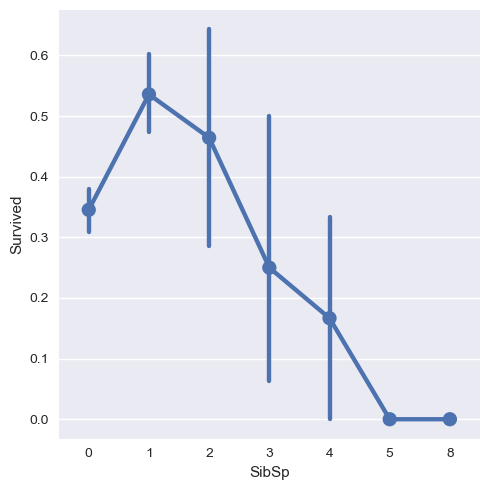

In [38]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.barplot(x='SibSp', y='Survived', data=df, ax=ax[0])
ax[0].set_title('SibSp vs Survived')

sns.factorplot(data=df, x='SibSp', y='Survived', ax=ax[1])
ax[1].set_title('SibSp vs Survived 2')

# plt.close(2)
plt.show()

In [33]:
pd.crosstab(df.SibSp, df.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


### Parch

In [34]:
pd.crosstab(df.Parch, df.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


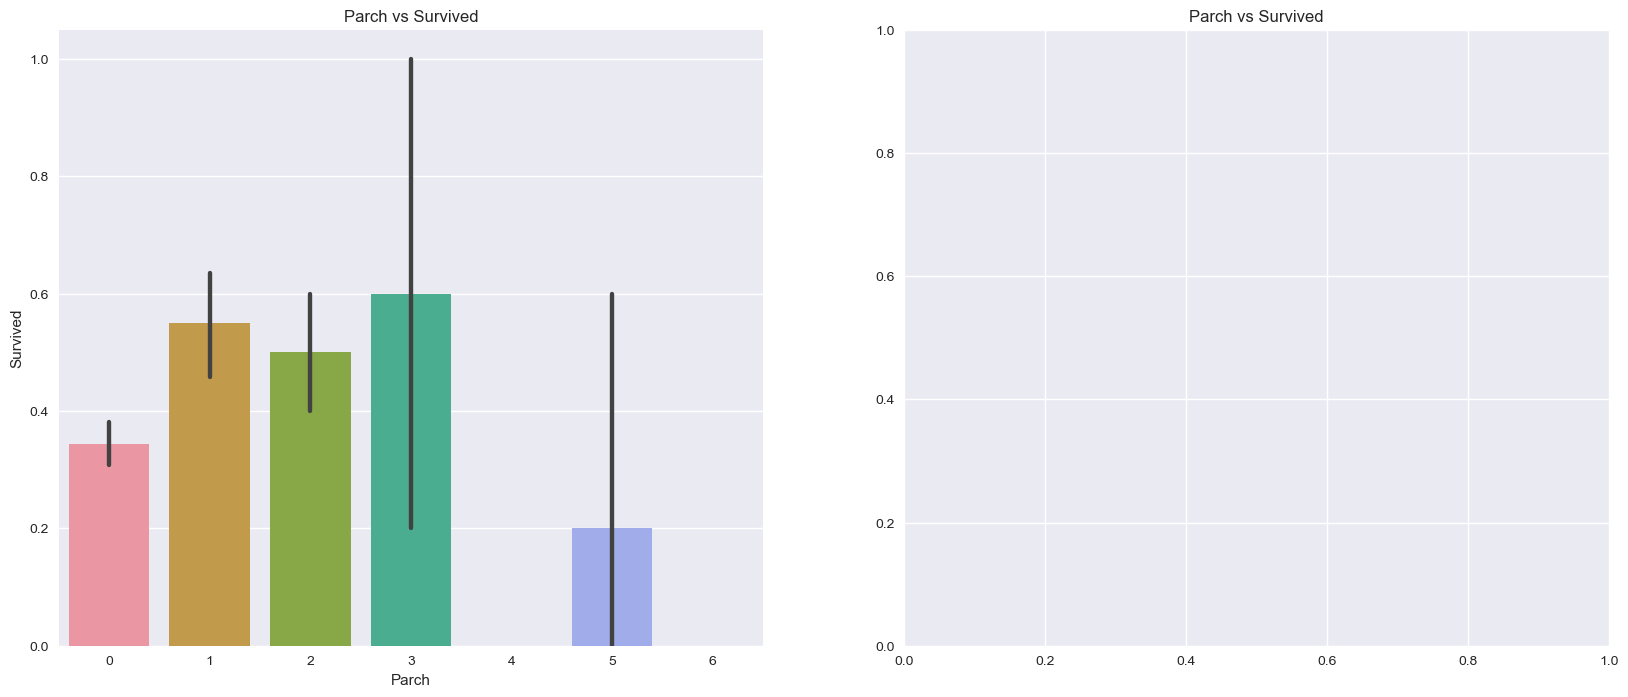

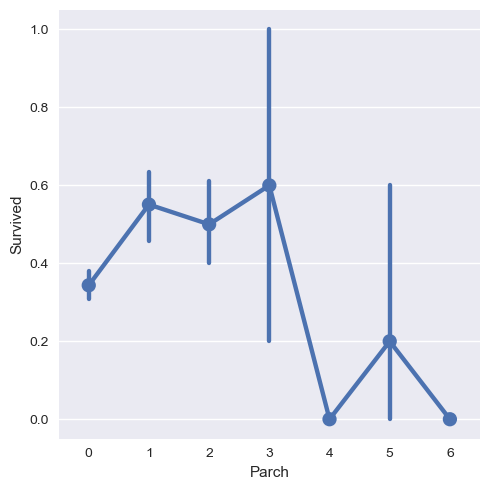

In [35]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot(data=df, x='Parch', y='Survived', ax=ax[0])
ax[0].set_title('Parch vs Survived')

sns.factorplot(data=df, x='Parch', y='Survived', ax=ax[1])
ax[1].set_title('Parch vs Survived')

# plt.close(2)
plt.show()

### Fare -> Continous Feature

In [36]:
print('Highest Fare was:', df['Fare'].max())
print('Lowest Fare was:', df['Fare'].min())
print('Average Fare was:', df['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


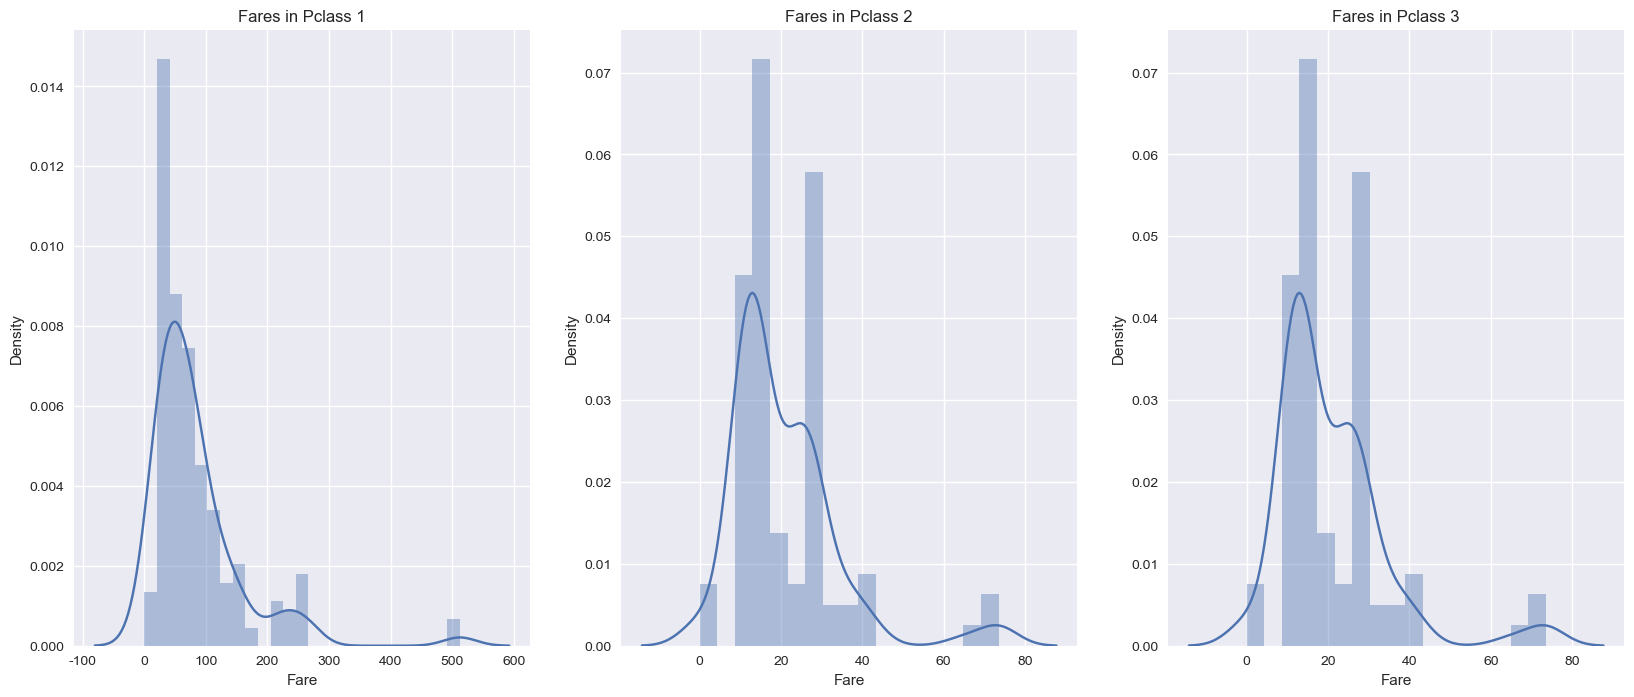

In [37]:
f, ax = plt.subplots(1, 3, figsize=(20, 8))
sns.distplot(df[df['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')

sns.distplot(df[df['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')

sns.distplot(df[df['Pclass']==2].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')

plt.show()

In [40]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.041709,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.091497,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.339582,0.083081,0.018443,-0.549500
Age,0.041709,-0.091497,-0.339582,1.000000,-0.267734,-0.198712,0.089087
SibSp,-0.057527,-0.035322,0.083081,-0.267734,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.198712,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.089087,0.159651,0.216225,1.000000


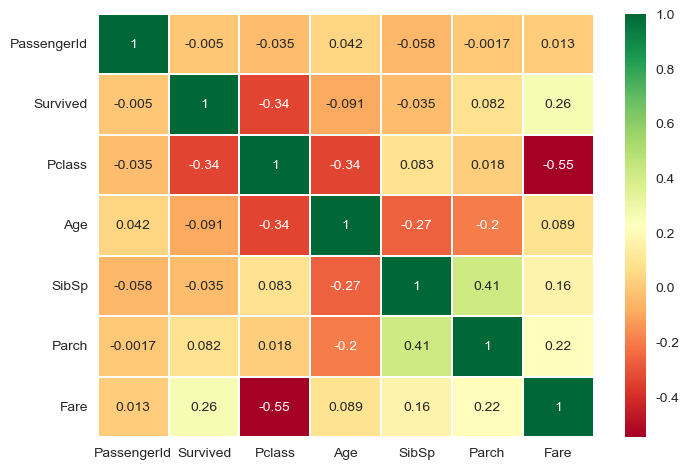

In [41]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
plt.show()

## Part2: Feature Engineering and Data Cleaning

### Age_band

In [42]:
df['Age_band'] = 0
df.loc[df['Age']<=16, 'Age_band'] = 0
df.loc[(df['Age']>16)&(df['Age']<=32), 'Age_band'] = 1
df.loc[(df['Age']>32)&(df['Age']<=48), 'Age_band'] = 2
df.loc[(df['Age']>48)&(df['Age']<=64), 'Age_band'] = 3
df.loc[df['Age']>64, 'Age_band'] = 4

df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [46]:
df.Age_band.value_counts().sort_index().to_frame().style.background_gradient(cmap='summer')

,Age_band
0,104
1,382
2,325
3,69
4,11


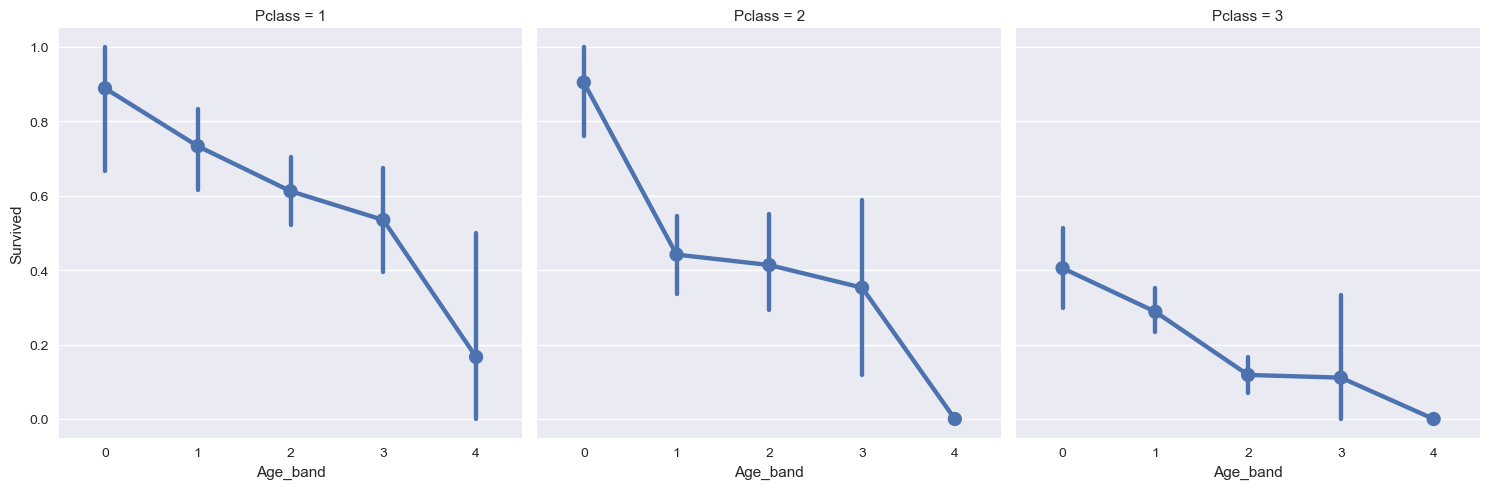

In [47]:
sns.factorplot(data=df, x='Age_band', y='Survived', col='Pclass')
plt.show()

### Family_Size and Alone

In [49]:
df['Family_Size'] = 0
df['Family_Size'] = df['Parch'] + df['SibSp']

df['Alone'] = 0
df.loc[df.Family_Size==0, 'Alone'] = 1

df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,0


In [64]:
df.Alone.value_counts()

1    537
0    354
Name: Alone, dtype: int64

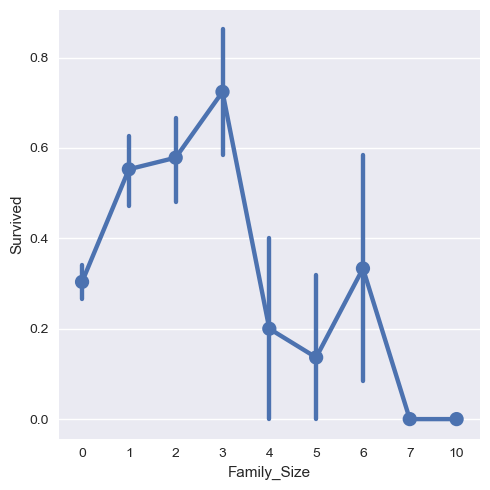

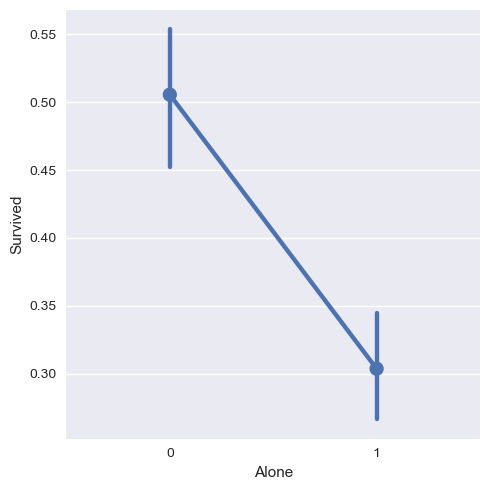

In [65]:
# f, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.factorplot(data=df, x='Family_Size', y='Survived', ax=ax[0])
ax[0].set_title('Family_Size vs Survived')

sns.factorplot(data=df, x='Alone', y='Survived', ax=ax[1])
ax[1].set_title('Alone vs Survived')

# plt.close(2)
# plt.close(3)

plt.show()

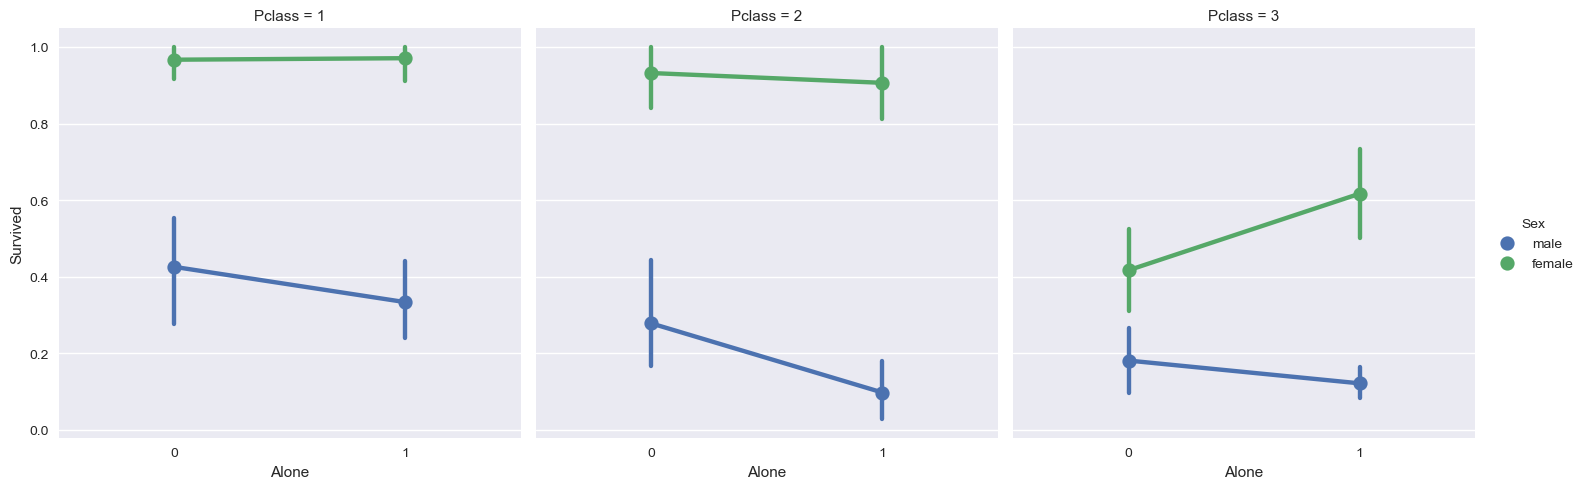

In [66]:
sns.factorplot(data=df, x='Alone', y='Survived', hue='Sex', col='Pclass')
plt.show()

### Fare_Range

In [70]:
pd.qcut(df['Fare'], 4)

0       (-0.001, 7.91]
1      (31.0, 512.329]
2       (7.91, 14.454]
3      (31.0, 512.329]
4       (7.91, 14.454]
            ...       
886     (7.91, 14.454]
887     (14.454, 31.0]
888     (14.454, 31.0]
889     (14.454, 31.0]
890     (-0.001, 7.91]
Name: Fare, Length: 891, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] < (31.0, 512.329]]

In [71]:
df['Fare_Range'] = pd.qcut(df['Fare'], 4)
df.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [73]:
df['Fare_cat'] = 0

df.loc[df['Fare']<=7.91, 'Fare_cat'] = 0
df.loc[(df['Fare']>7.91)&(df['Fare']<=14.454), 'Fare_cat'] = 1
df.loc[(df['Fare']>14.454)&(df['Fare']<=31), 'Fare_cat'] = 2
df.loc[(df['Fare']>31)&(df['Fare']<=513), 'Fare_cat'] = 3

df.Fare_cat.value_counts().sort_index()

0    223
1    217
2    229
3    222
Name: Fare_cat, dtype: int64

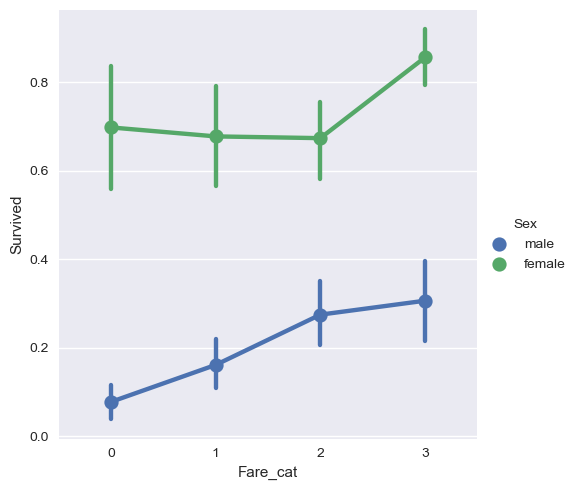

In [74]:
sns.factorplot(data=df, x='Fare_cat', y='Survived', hue='Sex')
plt.show()

### Converting String Values into Numeric

In [75]:
df['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
df['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)
df['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], [0, 1, 2, 3, 4], inplace=True)

df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,Alone,Fare_Range,Fare_cat
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,1,0,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1,2,1,0,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2,1,0,1,"(7.91, 14.454]",1


### Dropping Unneeded Features

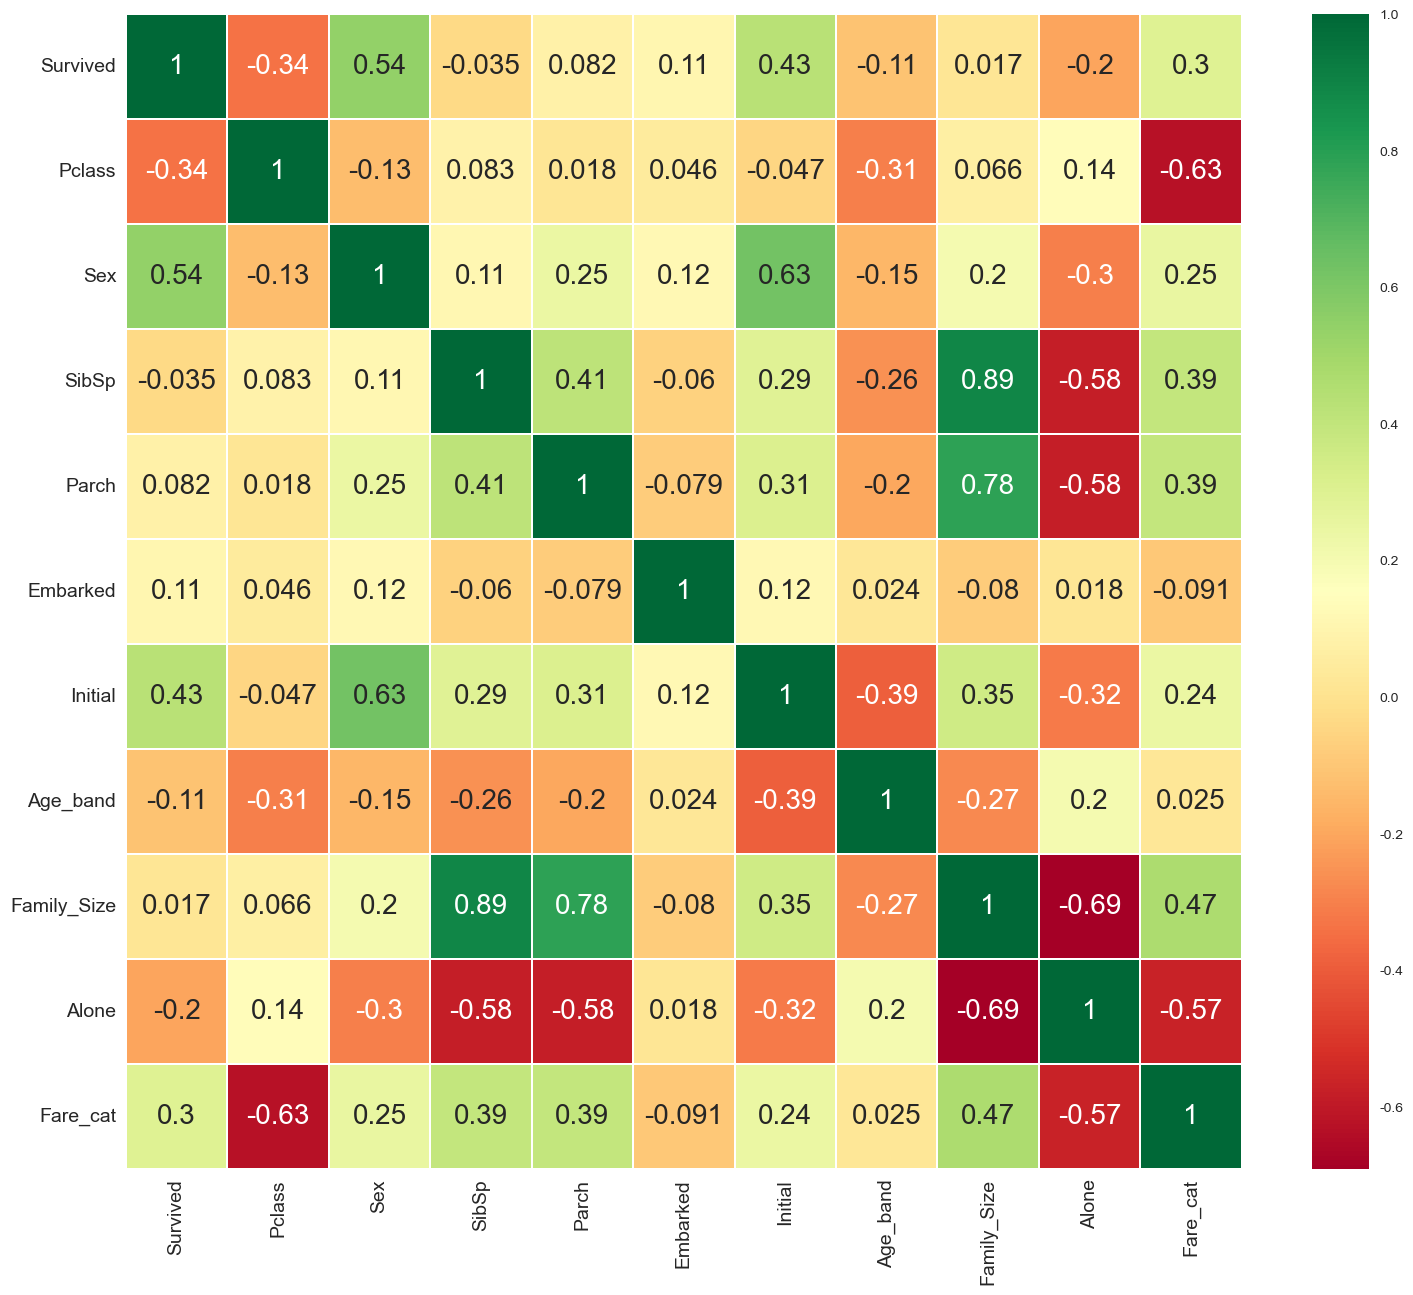

In [77]:
df.drop('Name Age Ticket Fare Cabin Fare_Range PassengerId'.split(' '), axis=1, inplace=True)

sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size': 20})

fig = plt.gcf()
fig.set_size_inches(18, 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## Part3: Predictive Modeling